# Generate Vibrio Sample

In [1]:
import os
from glob import glob

import cv2
import numpy as np
import matplotlib.pyplot as plt

from typing import Optional

plt.rcParams["figure.figsize"] = (10,10)

### Read Annotation Files

In [2]:
data_dir = '../dataset'

annotations = {}

for file in glob('{}/*.txt'.format(data_dir)):
    if os.path.basename(file) == 'classes.txt':
        continue
    
    key = os.path.splitext(os.path.basename(file))[0]
    
    filename = '{}/{}.jpg'.format(data_dir, key)
    img = cv2.imread(filename)
    img_h, img_w = img.shape[:2]

    with open(file) as f:
        annotation = f.readlines()
        annotation = np.asarray([np.asarray(label[:-1].split(' ')).astype(np.float32) for label in annotation])
        annotation[:, 1::2] *= img_w
        annotation[:, 2::2] *= img_h
        annotation = annotation.astype(int)

        annotations[key] = annotation

### Data Sample

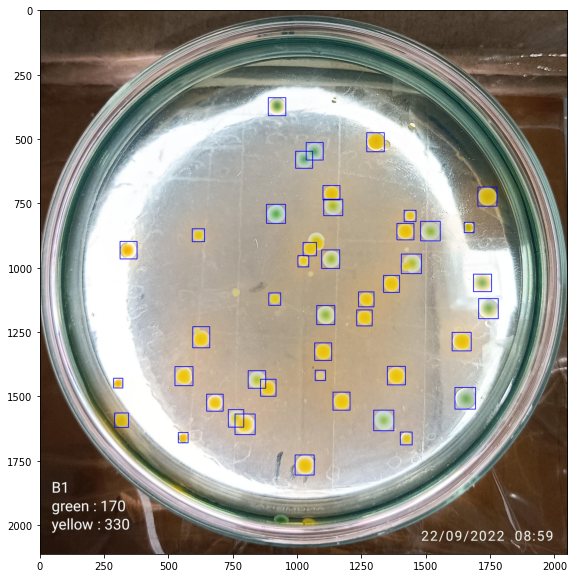

In [3]:
key = list(annotations.keys())[0]

annotation = annotations[key]

filename = '{}/{}.jpg'.format(data_dir, key)
img = cv2.imread(filename)
img_h, img_w = img.shape[:2]

for (xc, yc, w, h) in annotation[:, 1:]:

    x1 = xc - w //2
    x2 = xc + w //2
    y1 = yc - h //2
    y2 = yc + h //2

    img = cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### Generate Vibrio Sample Images

In [4]:
sample_save_dir = '../dataset/sample_vibrio'
if not os.path.exists(sample_save_dir):
    os.makedirs(sample_save_dir)

for key, labels in annotations.items():
    img_path = '{}/{}.jpg'.format(data_dir, key)
    img = cv2.imread(img_path)

    for i, (xc, yc, w, h) in enumerate(labels[:, 1:]):
        x1 = xc - w//2
        y1 = yc - h//2
        x2 = xc + w//2
        y2 = yc + h//2
        sample_img = img[y1:y2, x1:x2, :]

        save_filename = '{}/{}_{}.jpg'.format(sample_save_dir, key, str(i).zfill(3))
        cv2.imwrite(save_filename, sample_img)

# Explore Color Distribution of Vibrio Sample Images
After generate vibrio sample, then we need to separate the green-vibrio and yellow-vibrio to two different folders so that we can explore both vibrios separated

## Explore Yellow-Vibrio in HSV Color Space

In [5]:
src_dir = '../dataset/sample_vibrio/yellow'

images_hsv = []

filenames = glob('{}/*.jpg'.format(src_dir))
filenames.sort()

for filename in filenames:
    img = cv2.imread(filename)

    images_hsv.append(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))

### Visualize the HSV Color Space of Yellow-Vibrio

Visualize Hue Channel

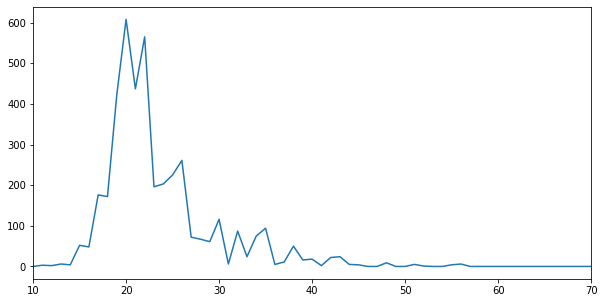

In [6]:
hist_h = np.asarray([cv2.calcHist(images_hsv[i][:,:,0], channels=[0], mask=None, histSize=[256], ranges=[0,256]) 
              for i in range(len(images_hsv))])

hist_h = np.sum(hist_h, axis=0)

plt.rcParams["figure.figsize"] = (10,5)
plt.xlim([10, 70])
plt.plot(hist_h)

Visualize Saturation Channel

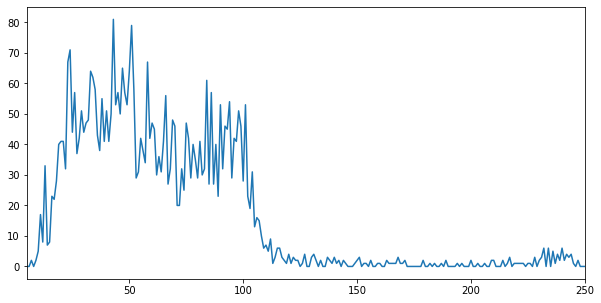

In [7]:
hist_s = np.asarray([cv2.calcHist(images_hsv[i][:,:,1], channels=[0], mask=None, histSize=[256], ranges=[0,256]) 
              for i in range(len(images_hsv))])

hist_s = np.sum(hist_s, axis=0)

plt.rcParams["figure.figsize"] = (10,5)
plt.xlim([5, 250])
plt.plot(hist_s)

Visualize Value Channel

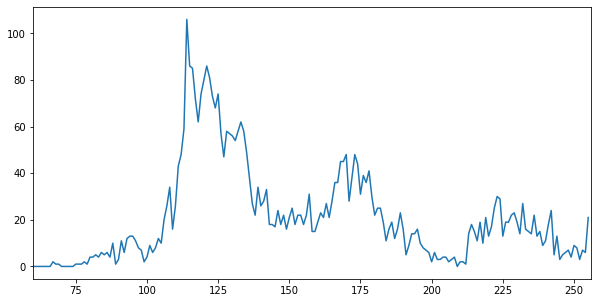

In [8]:
hist_v = np.asarray([cv2.calcHist(images_hsv[i][:,:,2], channels=[0], mask=None, histSize=[256], ranges=[0,256]) 
              for i in range(len(images_hsv))])

hist_v = np.sum(hist_v, axis=0)

plt.rcParams["figure.figsize"] = (10,5)
plt.xlim([60, 256])
plt.plot(hist_v)

### Conclusion
As we can see that Yellow-Vibrio has a minimum range of HSV is [10, 5, 75] and maximum range of [30, 250, 255], and we're going to explore more this value to localize the Yellow-Vibrio 

## Explore Green-Vibrio in HSV Color Space

### Visualize the HSV Color Space of Green-Vibrio

In [9]:
src_dir = '../dataset/sample_vibrio/green'

images_hsv = []

filenames = glob('{}/*.jpg'.format(src_dir))
filenames.sort()

for filename in filenames:
    img = cv2.imread(filename)

    images_hsv.append(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))

Visualize Hue Channel

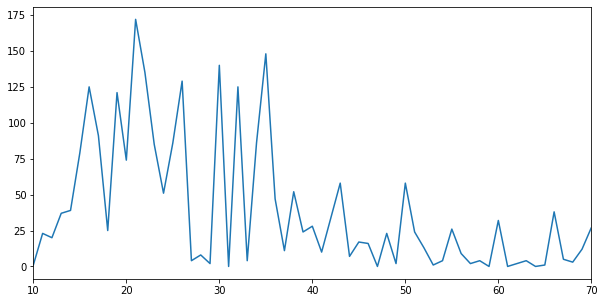

In [10]:
hist_h = np.asarray([cv2.calcHist(images_hsv[i][:,:,0], channels=[0], mask=None, histSize=[256], ranges=[0,256]) 
              for i in range(len(images_hsv))])

hist_h = np.sum(hist_h, axis=0)

plt.rcParams["figure.figsize"] = (10,5)
plt.xlim([10, 70])
plt.plot(hist_h)

Visualize Saturation Channel

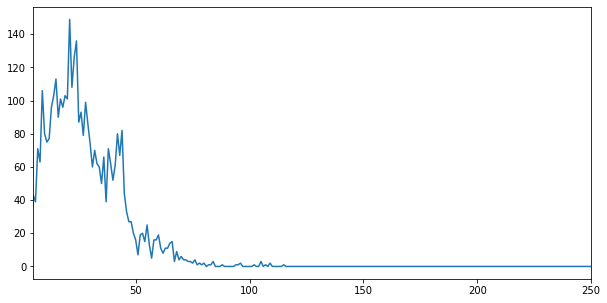

In [11]:
hist_s = np.asarray([cv2.calcHist(images_hsv[i][:,:,1], channels=[0], mask=None, histSize=[256], ranges=[0,256]) 
              for i in range(len(images_hsv))])

hist_s = np.sum(hist_s, axis=0)

plt.rcParams["figure.figsize"] = (10,5)
plt.xlim([5, 250])
plt.plot(hist_s)

Visualize Value Channel

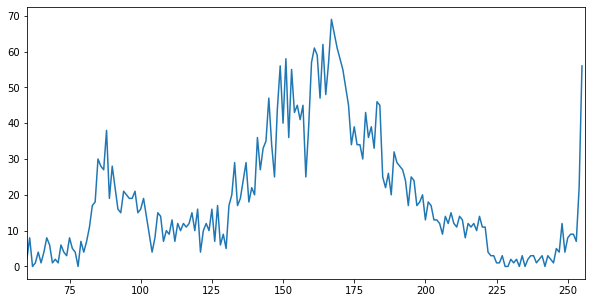

In [12]:
hist_v = np.asarray([cv2.calcHist(images_hsv[i][:,:,2], channels=[0], mask=None, histSize=[256], ranges=[0,256]) 
              for i in range(len(images_hsv))])

hist_v = np.sum(hist_v, axis=0)

plt.rcParams["figure.figsize"] = (10,5)
plt.xlim([60, 256])
plt.plot(hist_v)

### Conclusion
As we can see that Green-Vibrio has a minimum range of HSV is [15, 0, 50] and maximum range of [105, 45, 255], and we're going to explore more this value to localize the Green-Vibrio.